Régression linéaire avec une seule variable

In [22]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

data1 = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])


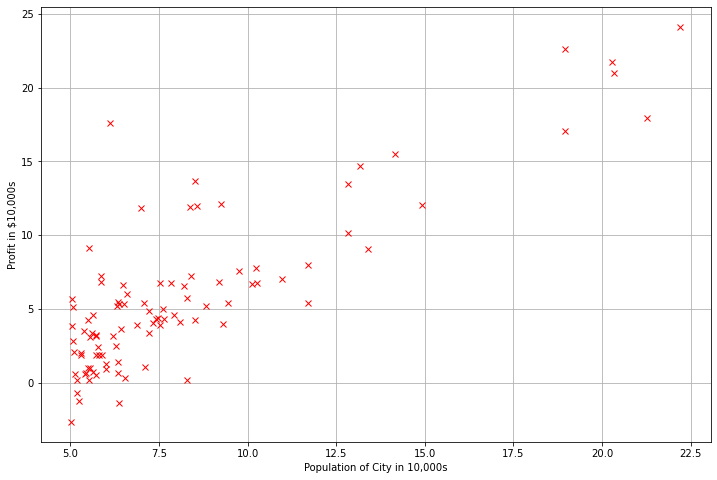

In [23]:
plt.figure(figsize=(12, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.plot(data1.Population, data1.Profit, 'rx')

In [24]:

n = len(data1.columns)-1
def prepareData(data, n):
   
    data.insert(0, 'Ones', 1)

    x = data.iloc[:, 0:n+1]
    y = data.iloc[:, n+1:n+2]

 
    x = np.matrix(x.values)
    y = np.matrix(y.values)
    theta = np.matrix(np.zeros((n+1, 1)))
    return x, y, theta

x, y, theta = prepareData(data1, n)

In [25]:
iterations = 1500
alpha = 0.01

x.shape, y.shape, theta.shape

((97, 2), (97, 1), (2, 1))

In [26]:
def computeCost(x, y, theta):
   
    m = len(x)
    cost = np.sum(np.square((x * theta) - y)) / (2 * m)
    return cost

computeCost(x, y, theta)

32.072733877455676

In [27]:
def gradientDescent(x, theta, iterations):
   
    m = len(x)
    J_vals = []
    
    for i in range(iterations):
        error = (x * theta) - y
        for j in range(len(theta.flat)):
            theta.T[0, j] = theta.T[0, j] - (alpha/m) * np.sum(np.multiply(error, x[:, j]))
        J_vals.append(computeCost(x, y, theta))
    return (theta, J_vals)

theta, J_vals = gradientDescent(x, theta, iterations)

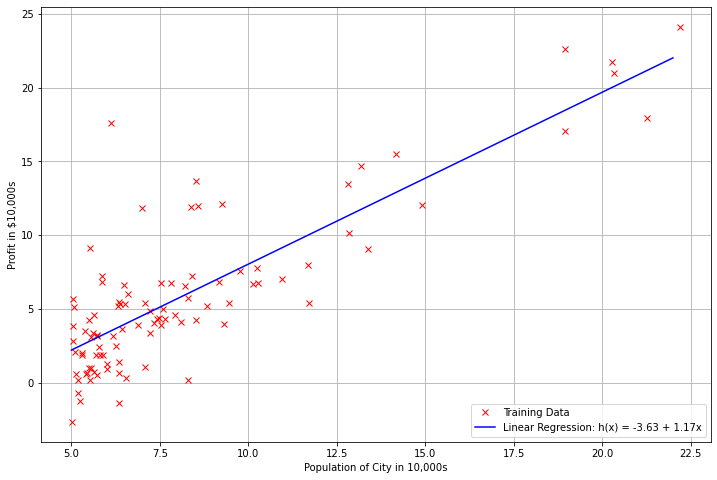

In [28]:
theta_f = list(theta.flat)
xs = np.arange(5, 23)
ys = theta_f[0] + theta_f[1] * xs

plt.figure(figsize=(12, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.plot(data1.Population, data1.Profit, 'rx', label='Training Data')
plt.plot(xs, ys, 'b-', label='Linear Regression: h(x) = %0.2f + %0.2fx'%(theta[0], theta[1]))
plt.legend(loc=4)

Linear regression with multiple variables

In [8]:
data2 = pd.read_csv('ex1data2.txt', names=['Size', 'Bedrooms', 'Price'])


,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [9]:
#soustraction et division
data2.iloc[:, 0:2] = data2.iloc[:, 0:2].apply(lambda x: (x - np.mean(x)) / np.std(x))
data2.describe()

,Size,Bedrooms,Price
count,4.700000e+01,4.700000e+01,47.000000
mean,-9.448707e-18,2.480285e-16,340412.659574
std,1.010811e+00,1.010811e+00,125039.899586
min,-1.461049e+00,-2.882690e+00,169900.000000
25%,-7.233261e-01,-2.260934e-01,249900.000000
50%,-1.433229e-01,-2.260934e-01,299900.000000
75%,3.412850e-01,1.102205e+00,384450.000000
max,3.150993e+00,2.430504e+00,699900.000000


In [10]:
n = len(data2.columns)-1
x, y, theta = prepareData(data2, n)

In [15]:
alpha = 0.15

x.shape, y.shape, theta.shape

((47, 3), (47, 1), (3, 1))

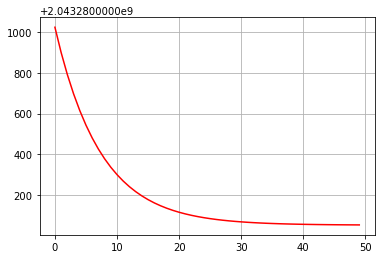

In [17]:
theta, J_vals = gradientDescent(x, theta, iterations=50)

plt.grid()
plt.plot(range(50), J_vals, 'r')